# Nhóm 9

**Thành viên:**

- Huỳnh Lê Minh Nhật - 1712632
- Huỳnh Ngọc Quân - 1712689
- Phạm Minh Thắng - 1712759
- Nguyễn Đức Huy - 1712492

 # 1. Data Preparation

Nhóm sử dụng 2 nguồn dữ liệu:

- Dữ liệu được crawl trực tiếp từ trang www.worldometers.info/coronavirus vào ngày 14/08/2020

Dữ liệu chứa thông tin tình hình dịch bệnh của 215 quốc gia/vùng lãnh thổ và du thuyền, được cập nhật đến ngày 14/08/2020

- Dữ liệu dạng time series lấy từ https://github.com/CSSEGISandData/COVID-19

Dữ liệu dạng time series từ ngày 22/01/2020 đến 14/08/2020

## 1.1. Data 14/08/2020

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('data/data_140820.csv')
df=data.sort_values(by='total_cases',ascending=False)
df

,country,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases,serious,cases_per_mpop,deaths_per_mpop,total_tests,tests_per_mpop,population,continent
1,USA,5476266,60600,171535,1120,2875147.0,2429584.0,17217,16533,518.0,69362009,209401,331240477,North America
2,Brazil,3278895,49274,106571,1007,2384302.0,788022.0,8318,15412,501.0,13464336,63289,212743668,South America
3,India,2525222,65609,49134,990,1807556.0,668532.0,8944,1828,36.0,27694416,20045,1381641319,Asia
4,Russia,912823,5065,15498,114,722964.0,174361.0,2300,6255,106.0,31903055,218600,145942287,Europe
5,South Africa,579140,6275,11556,286,461734.0,105850.0,539,9750,195.0,3351111,56418,59397910,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Western Sahara,10,0,1,0,8.0,1.0,0,17,2.0,0,0,599004,Africa
211,MS Zaandam,9,0,2,0,0.0,7.0,0,0,0.0,0,0,0,NaN
212,British Virgin Islands,9,0,1,0,7.0,1.0,0,297,33.0,1522,50304,30256,North America
213,Saint Pierre Miquelon,4,0,0,0,1.0,3.0,0,691,0.0,0,0,5790,North America


### Ý nghĩa các cột dữ liệu
Country: tên nước 

Total_cases: tổng số ca mắc 

New_cases: số ca mắc mới (theo ngày)

Total_deaths: tổng số ca tử vong

New_deaths: số ca tử vong (theo ngày)

Total_recovered: tổng số ca đã khỏi bệnh

Active_cases: tổng số ca còn bệnh

Serious: số ca nghiêm trọng

Cases_per_mpop:

Deaths_per_mpop: 

Total_tests: tổng số người đã được kiểm tra 

Test_per_mpop:

Population: dân số

Continent: lục địa

## 1.2. Time Series Data

In [ ]:
total_sr_df=pd.read_csv('data/global_confirmed_sr.csv')
death_sr_df=pd.read_csv('data/global_deaths_sr.csv')
recovered_sr_df=pd.read_csv('data/global_recovered_sr.csv')

total_sr_df.drop(['Province/State', 'Lat', 'Long'],axis=1,inplace=True)
death_sr_df.drop(['Province/State', 'Lat', 'Long'],axis=1,inplace=True)
recovered_sr_df.drop(['Province/State', 'Lat', 'Long'],axis=1,inplace=True)

total_sr_df=total_sr_df.groupby('Country/Region').sum()
death_sr_df=death_sr_df.groupby('Country/Region').sum()
recovered_sr_df=recovered_sr_df.groupby('Country/Region').sum()

temp=list(total_sr_df.sum(axis=0))
total_sr_df.loc['Global']=temp

temp=list(death_sr_df.sum(axis=0))
death_sr_df.loc['Global']=temp

temp=list(recovered_sr_df.sum(axis=0))
recovered_sr_df.loc['Global']=temp

recovered_sr_df.to_csv('covid_recovered.csv')

# 2. Visualize

## 2.1. Data 14/08/2020

### 2.1.1. Biểu đồ tròn thể hiện tỉ lệ ca nhiễm giữa các nước

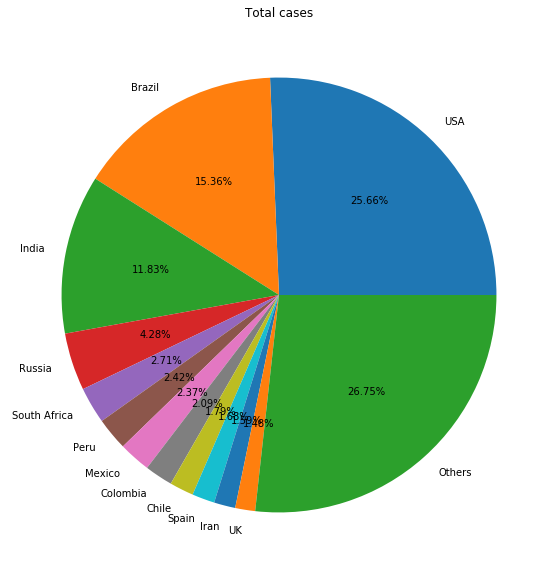

In [ ]:
total_cases_df=df[['country','total_cases']]
pie_df=total_cases_df.iloc[0:12].copy(deep=True)
pie_df.loc[pie_df.index.max()+1]=['Others',np.sum(total_cases_df['total_cases'].iloc[12:])]

labels=pie_df['country']
fig,ax=plt.subplots(figsize=(10,10))
ax.pie(pie_df['total_cases'],labels=labels,autopct='%1.2f%%')
ax.set_title("Total cases")
plt.show()

### 2.1.2. Biểu đồ tròn thể hiện tỉ lệ số ca tử vong giữa các nước

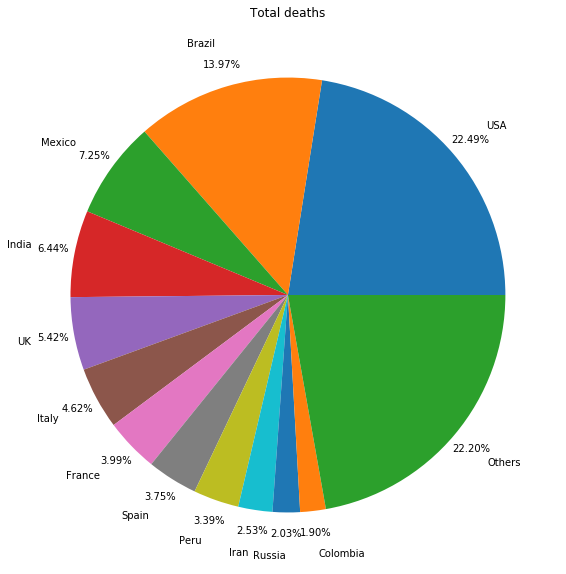

In [ ]:
total_deaths_df=df[['country','total_deaths']].sort_values(by='total_deaths',ascending=False)
pie_df=total_deaths_df.iloc[0:12].copy(deep=True)
pie_df.loc[pie_df.index.max()+1]=['Others',np.sum(total_deaths_df['total_deaths'].iloc[12:])]

labels=pie_df['country']
fig,ax=plt.subplots(figsize=(10,10))
ax.pie(pie_df['total_deaths'],labels=labels,autopct='%1.2f%%',pctdistance=1.1, labeldistance=1.2)
ax.set_title("Total deaths")
plt.show()

### 2.1.3. Tương quan giữa số lượng ca đang chữa trị - tử vong - hồi phục

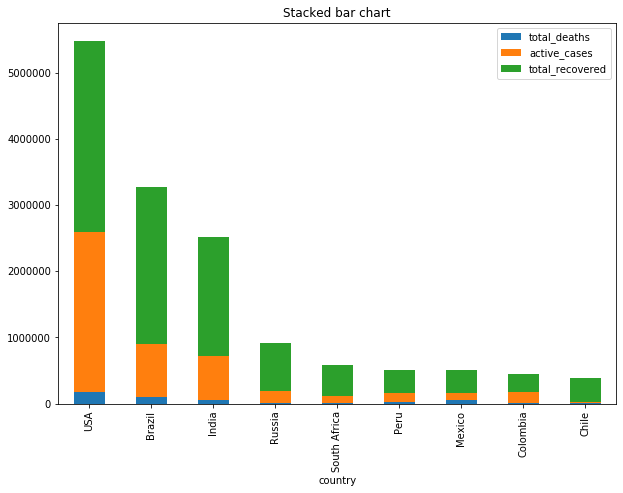

In [ ]:
stack_df=df[['country','total_deaths','active_cases','total_recovered','total_cases']].iloc[:10].copy(deep=True).set_index('country')
stack_df.dropna(inplace=True)
ax=stack_df.iloc[:,:3].plot(kind='bar',stacked=True,figsize=(10,7))
ax.set_title("Stacked bar chart")
plt.show()

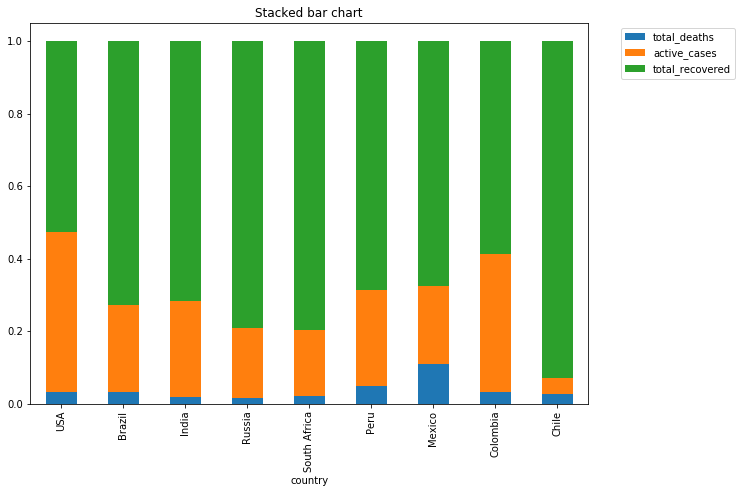

In [ ]:
norm_stack_df=stack_df.div(stack_df['total_cases'],axis=0)
ax=norm_stack_df.iloc[:,:3].plot(kind='bar',stacked=True,figsize=(10,7))
ax.set_title("Stacked bar chart")
ax.legend(bbox_to_anchor=(1.05, 1))
plt.show()

### 2.1.4. Phân bố tỉ lệ tử vong/tổng số ca nhiễm của các quốc gia

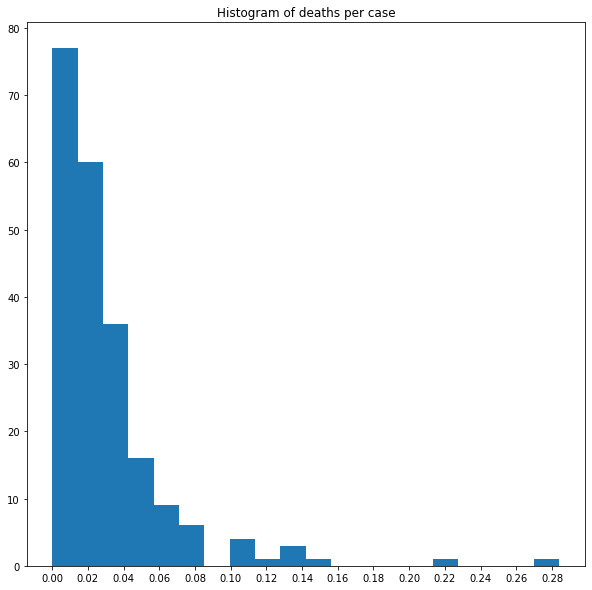

In [ ]:
death_per_case_df=df[['country','total_deaths']].copy(deep=True)
death_per_case_df['death_per_case']=death_per_case_df['total_deaths'].div(df['total_cases'].values,axis=0)
death_per_case_df=death_per_case_df.sort_values(by='death_per_case',ascending=False)

fig, ax=plt.subplots(figsize=(10,10))
ax.hist(x=death_per_case_df['death_per_case'],bins=20)
ax.set_title('Histogram of deaths per case')
plt.xticks(np.arange(0,0.3,0.02))
plt.show()

Dựa vào hình này, ta có thể thấy đa phần các nước có tỷ lệ tử vong khá thấp (tập trung ở khoảng 0.1 trở xuống), tuy nhiên vẫn có vài nước ngoại lệ với tỉ lệ tử vong trên 0.2

## 2.2. Time Series Data

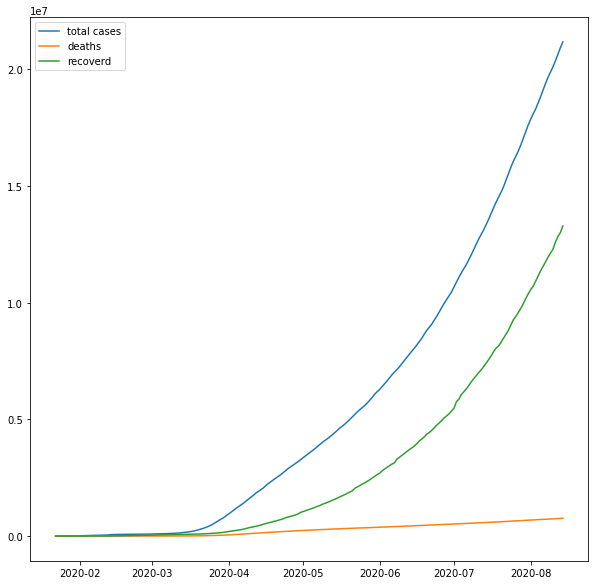

In [ ]:
total=total_sr_df.loc['Global']
deaths=death_sr_df.loc['Global']
recovered=recovered_sr_df.loc['Global']

total.index=pd.to_datetime(total.index)
deaths.index=pd.to_datetime(deaths.index)
recovered.index=pd.to_datetime(recovered.index)

fig, ax=plt.subplots(figsize=(10,10))
ax.plot(total)
ax.plot(deaths)
ax.plot(recovered)
ax.legend(['total cases', 'deaths', 'recoverd'])

plt.show()

Dựa vào biểu đồ trên, ta có thể thấy rằng số ca lây nhiễm bắt đầu tăng mạnh từ giữa tháng 03/2020, thể hiện qua việc đồ thị càng dốc theo thời gian. Số ca hồi phục cũng tăng khá mạnh, trong khi số ca tử vong tăng chậm. Điều này thể hiện được khả năng y tế nhìn chung tương đối tốt khi có thể hồi phục và chữa khỏi nhiều trường hợp, đồng thời giảm tỉ lệ tử vong. Nhưng bên cạnh đó, việc số ca lây nhiễm ngày càng tăng mạnh chứng tỏ công tác phòng ngừa lây lan vẫn còn chưa thực sự tốt ở nhiều quốc gia.

# 3. Apply ARIMA Model

In [ ]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [ ]:
def split_data(df, location, p=0.9):
    cases=df.loc[location]
    #cases=cases[cases>0].copy().astype('float32')
    cases=cases.copy().astype('float32')
    cases.index = pd.to_datetime(cases.index)
    
    k=int(np.ceil(len(cases)*p))
    
    train=cases.iloc[:k]
    test=cases.iloc[k:]
    
    return train,test

## 3.1. Predict Total cases for next 10 days

In [ ]:
(train,test)=split_data(total_sr_df,'Global')
train

2020-01-22         555.0
2020-01-23         654.0
2020-01-24         941.0
2020-01-25        1434.0
2020-01-26        2118.0
                 ...    
2020-07-21    14947990.0
2020-07-22    15228469.0
2020-07-23    15511225.0
2020-07-24    15792390.0
2020-07-25    16047935.0
Name: Global, Length: 186, dtype: float32

In [ ]:
predict_index=test.index
for i in range(10):
    predict_index=predict_index.append(pd.Index([predict_index[-1]+pd.Timedelta(days=1)]))
predict_index

DatetimeIndex(['2020-07-26', '2020-07-27', '2020-07-28', '2020-07-29',
               '2020-07-30', '2020-07-31', '2020-08-01', '2020-08-02',
               '2020-08-03', '2020-08-04', '2020-08-05', '2020-08-06',
               '2020-08-07', '2020-08-08', '2020-08-09', '2020-08-10',
               '2020-08-11', '2020-08-12', '2020-08-13', '2020-08-14',
               '2020-08-15', '2020-08-16', '2020-08-17', '2020-08-18',
               '2020-08-19', '2020-08-20', '2020-08-21', '2020-08-22',
               '2020-08-23', '2020-08-24'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=3973.379, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=3975.132, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=3974.984, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3973.962, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0] intercept
Total fit time: 0.296 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  186
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1984.690
Date:                Sat, 15 Aug 2020   AIC                           3973.379
Time:                        22:17:53   BIC                           3979.809
Sample:                             0   HQIC                          3975.985
                                - 186                                         
Co

C:\Users\hlmin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\hlmin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


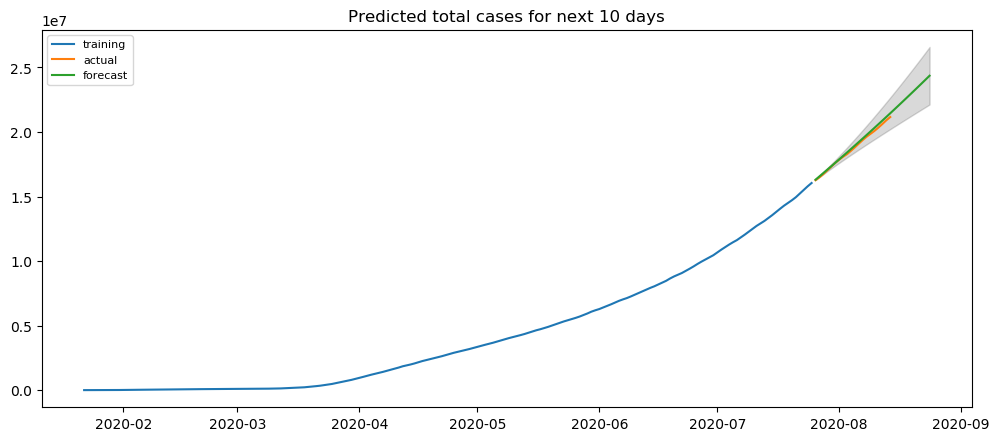

In [ ]:
model = ARIMA(train, order=(0,2,0))  
fitted = model.fit(disp=-1)
fc, se, conf = fitted.forecast(len(test)+10, alpha=0.05)

fc_series = pd.Series(fc, index=predict_index)
lower_series = pd.Series(conf[:, 0], index=predict_index)
upper_series = pd.Series(conf[:, 1], index=predict_index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Predicted total cases for next 10 days')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## 3.2. Predict Total deaths for next 10 days

In [ ]:
(train,test)=split_data(death_sr_df,'Global')

model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=3027.995, Time=0.30 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=3047.893, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=3049.299, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=3048.682, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3046.090, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=3014.999, Time=0.35 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=3039.757, Time=0.04 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=3010.298, Time=0.50 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=3034.194, Time=0.10 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=2964.565, Time=0.67 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=3020.833, Time=0.33 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=2943.559, Time=0.73 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=i

C:\Users\hlmin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\hlmin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


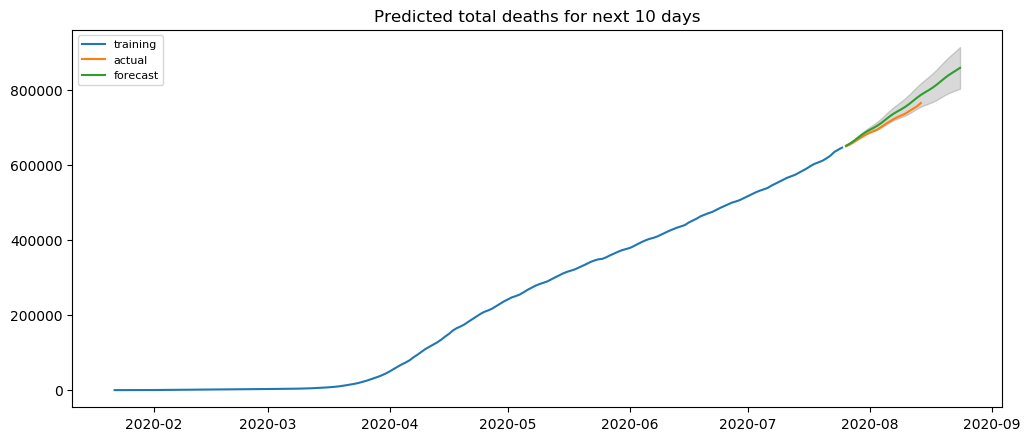

In [ ]:
model = ARIMA(train, order=(2,2,3))  
fitted = model.fit(disp=-1)
fc, se, conf = fitted.forecast(len(test)+10, alpha=0.05)

fc_series = pd.Series(fc, index=predict_index)
lower_series = pd.Series(conf[:, 0], index=predict_index)
upper_series = pd.Series(conf[:, 1], index=predict_index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Predicted total deaths for next 10 days')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## 3.3. Predict Vietnam's total cases for next 10 days

In [ ]:
(train,test)=split_data(total_sr_df,'Vietnam')

model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=1002.117, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1087.217, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=1039.933, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=1000.266, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1085.217, Time=0.02 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=1002.100, Time=0.15 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=1002.288, Time=0.34 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=998.358, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1000.207, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=1000.190, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1037.933, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=1000.380, Time=0.21 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 1.109 seconds
                               SARIMAX Results                                
Dep. Varia

C:\Users\hlmin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\hlmin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


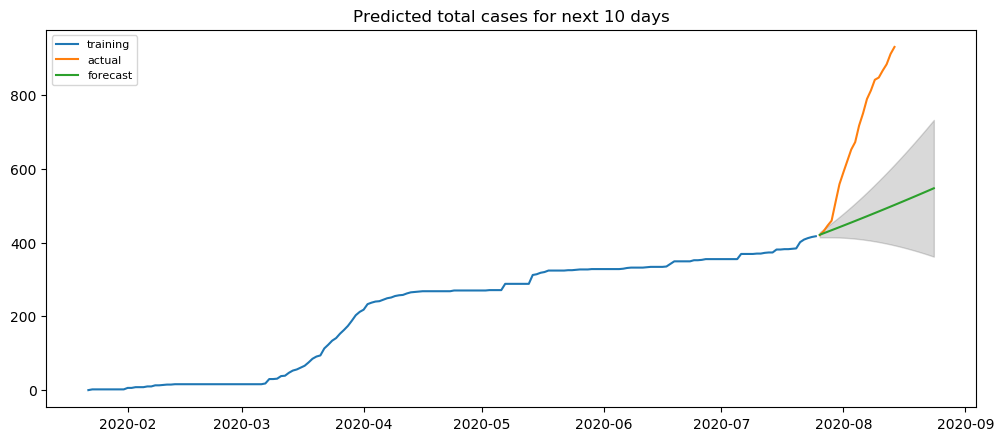

In [ ]:
model = ARIMA(train, order=(0,2,1))  
fitted = model.fit(disp=-1)
fc, se, conf = fitted.forecast(len(test)+10, alpha=0.05)

fc_series = pd.Series(fc, index=predict_index)
lower_series = pd.Series(conf[:, 0], index=predict_index)
upper_series = pd.Series(conf[:, 1], index=predict_index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Predicted Vietotal cases for next 10 days')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# 4. Insight

Một số thông tin hữu ích mà nhóm rút ra được qua việc phân tích dữ liệu:

**1. Tình hình hiện tại:**

**Theo lục địa**

- Châu Á, dù là nguồn gốc của đại dịch COVID-19 (Trung Quốc), lại có số ca nhiễm thấp.

- Châu Phi có số ca nhiễm thấp hơn đáng kể so với các khu vực còn lại, có lẽ vì biện pháp phòng tránh, phong tỏa tốt.

- Những nơi có nhiệt độ thấp dễ lây lan hơn(Châu Mỹ, Châu Âu)

**Theo quốc gia**
- Ta có thể thấy Hoa Kỳ hiện đang là quốc gia có số ca nhiễm
cao nhất thế giới với 25.66%,. Có thể thấy rằng các quốc gia có số lượng ca nhiễm lớn tập
trung chủ yếu ở các nước Bắc Mỹ và Châu Âu. Trong khi châu Á rất ít
quốc gia nằm trong top 10, đặc biệt là Trung Quốc, đất nước khởi nguồn
của đại dịch COVID-19 đã nằm ngoài top 10.

- Mexico là nước có tỷ lệ tử vong trên tổng số ca nhiễm cao nhất trong
top 8 quốc gia có số ca nhiễm lớn nhất. Điều này có thể phản ánh
sự quá tải về y tế của quốc gia này trong giai đoạn bùng phát dịch.

- Chile có số ca đang nhiễm rất thấp và số ca đã khỏi rất cao. Điều đó chứng tỏ Chile đang có những động thái khống chế dịch hiệu quả.

- Hoa Kỳ đang có tỉ lệ các ca đang nhiễm rất lớn và vẫn chưa có dấu hiệu suy giảm. Điều này hợp lý khi hiện tại người dân ở đây phần lớn không có động thái nghiêm túc trong công tác phòng chống dịch, thậm chí họ còn coi thường dịch bệnh.


**2. Dự đoán:**
- Thế giới vẫn tăng nhanh về số ca nhiễm cũng như ca tử vong, dự đoán sẽ đạt 25 triệu ca 10 ngày tới. Nhìn vào biểu đồ có thể thấy, hiện tại chưa ở đỉnh dịch nên thời gian tới dịch bệnh vẫn sẽ diễn biến rất phức tạp

- Theo như dự đoán thì 10 ngày tới, Việt Nam chỉ tăng nhẹ về số ca nhiễm và nằm ở mức 500 ca. Tuy nhiên, do yếu tố chủ quan mà hiện tại số ca đã tăng vọt và vượt mức 800.

# 5. References

[1] https://www.worldometers.info/coronavirus/

[2] https://github.com/CSSEGISandData/COVID-19

[3] https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/